# Question 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
%matplotlib inline

In [59]:
def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))

def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def bilateral_filter(img,sigma1,sigma2,win):
    
    final_img=np.zeros(img.shape,dtype='int64')
    wind_size=win
    new_img = cv2.copyMakeBorder(img,wind_size//2,wind_size//2,wind_size//2,wind_size//2,cv2.BORDER_REPLICATE)
    img=new_img
    new_img=np.array(new_img,dtype='int64')
    for i in range(win//2,len(new_img)-win//2):
        if i%100==0:
            print(i)

        for j in range(win//2,len(new_img[i])-win//2):
            nterm=0.0
            fterm=0.0
            for it1 in range(i-win//2,i+win//2):
                for it2 in range(j-win//2,j+win//2):
                    ival=gaussian(abs(new_img[i][j]-new_img[it1][it2]),sigma1)*gaussian(distance(i,j,it1,it2),sigma2)
                    fterm+=ival*new_img[it1][it2]
                    nterm+=ival
            final_img[i-win//2][j-win//2]=round(fterm/nterm)
    
    #plt.imshow(np.array(final_img),cmap='gray',vmin=0, vmax=255)
    #plt.show()
    cv2.imwrite('../output/bilateral3.png',final_img)
    return final_img
    

### Original face.png

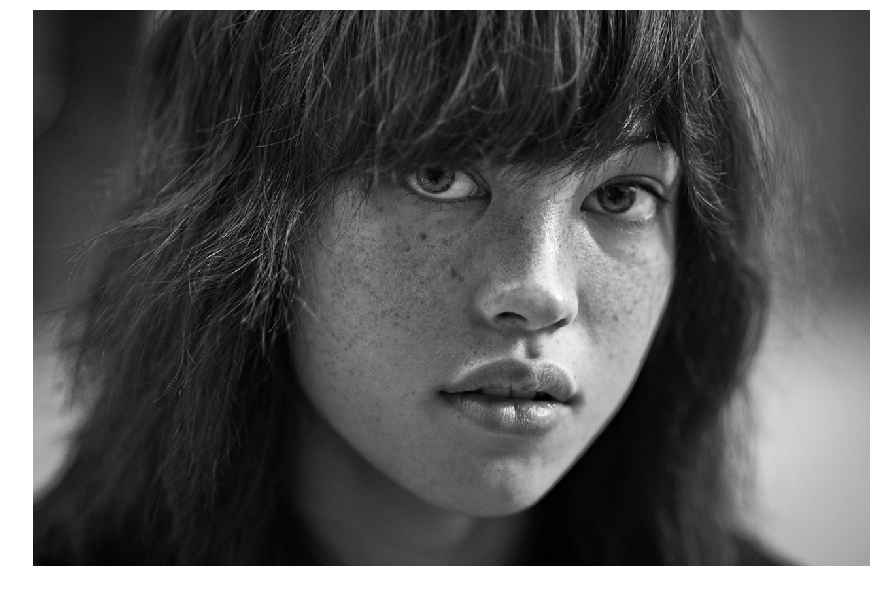

In [41]:
im1=cv2.imread('../input_data/face.jpg',0)
cv2.imwrite('../output/highboost1.png',im1)
#im1=cv2.resize(im1,(200,200))
plt.figure(figsize = (15,15))
plt.axis('off')
plt.imshow(im1,cmap='gray',vmin=0,vmax=255)

### face.png after applying bilateral filtering

100
200
300
400
500
600
700
800


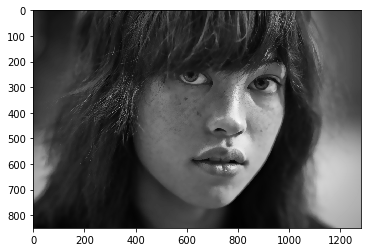

In [42]:
bilateral_filter(im1,12.0,16.0,15)

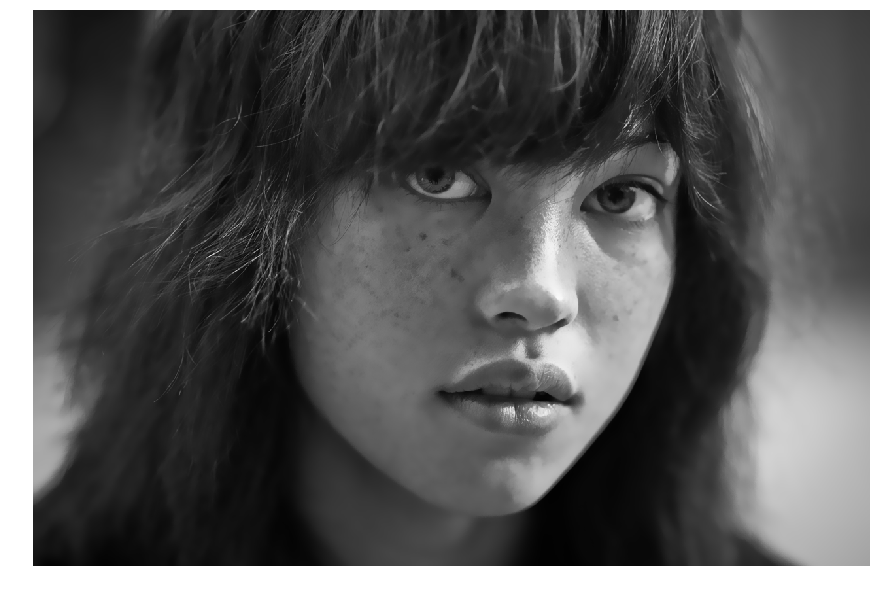

In [43]:
bil_im=cv2.imread('../output/bilateral.png')
plt.figure(figsize = (15,15))
plt.axis('off')
plt.imshow(bil_im,cmap='gray',vmin=0,vmax=255)

### face.png after applying highboost filtering

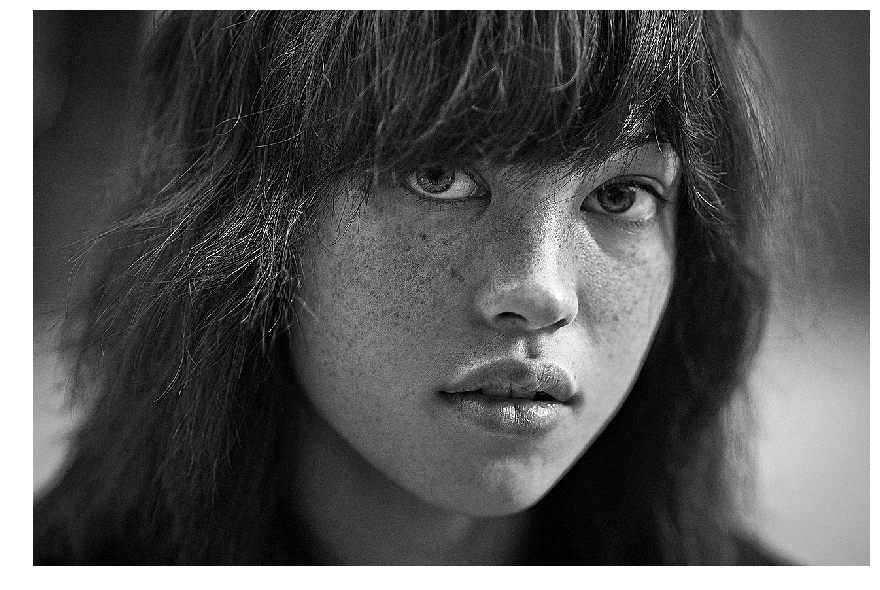

In [36]:
laplacian=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
out=cv2.filter2D(im1,-1,laplacian)
cv2.imwrite("../output/highboost.png",out)
plt.figure(figsize = (15,15))
plt.axis('off')
plt.imshow(out,cmap='gray',vmin=0,vmax=255)

### Original face3.png

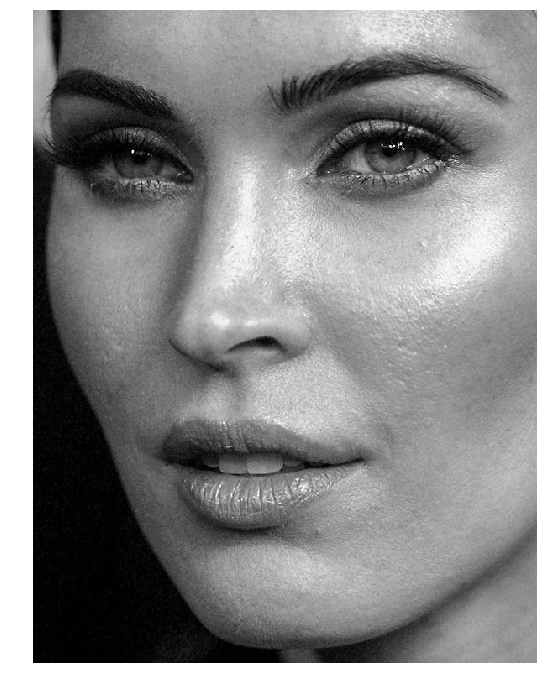

In [52]:
im1=cv2.imread('../input_data/face3.jpg',0)
cv2.imwrite('../output/highboost3.png',im1)
#im1=cv2.resize(im1,(200,200))
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(im1,cmap='gray',vmin=0,vmax=255)

### face3.png after applying bilateral filtering

100
200
300
400
500
600
700


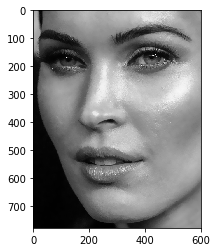

In [47]:
bilateral_filter(im1,12.0,16.0,15)

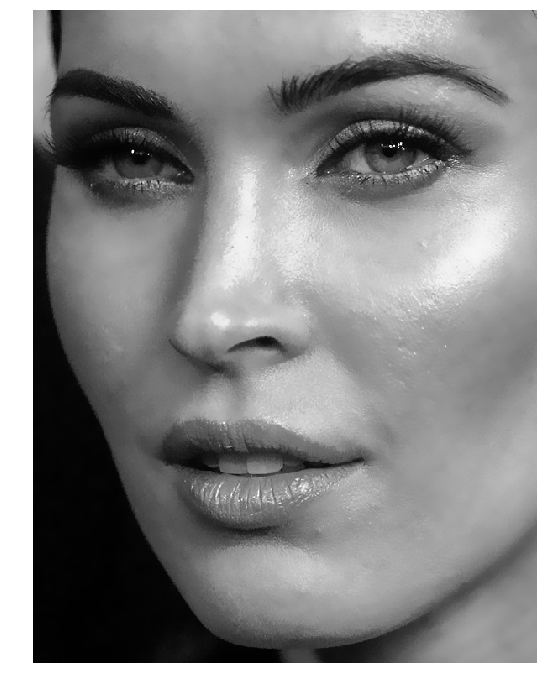

In [50]:
bil_im=cv2.imread('../output/bilateral3.png')
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(bil_im,cmap='gray',vmin=0,vmax=255)

### face3.png after applying highboost filtering

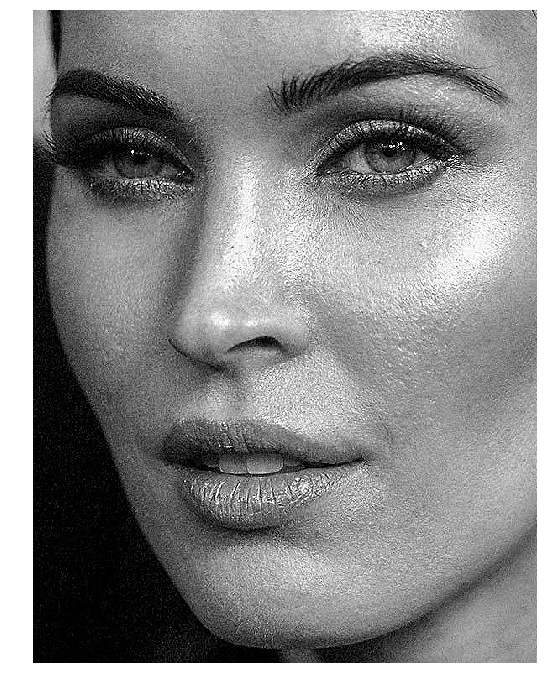

In [51]:
laplacian=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
out=cv2.filter2D(im1,-1,laplacian)
cv2.imwrite("../output/highboost3.png",out)
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(out,cmap='gray',vmin=0,vmax=255)

 - On regions with intensity discontinuity it will try to preserve the intensities because range filter will have a higher component than the gaussian filter which is trying to blur it.
 <br>
 - Bilinear filtering vs Highboost : Highboost only takes domain(distance) into consideration and not their actual intensity values , whereas Bilinear filtering takes both the range(actual intensity values) and domain(distance) into account .

100
100
100
100
100
100
100
100
100


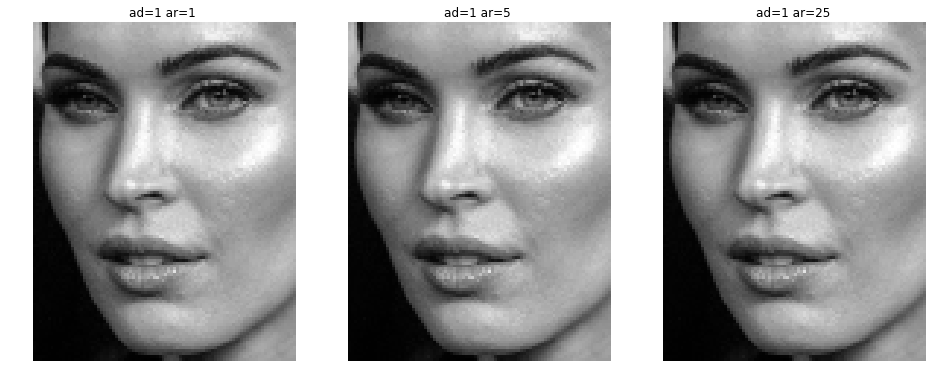

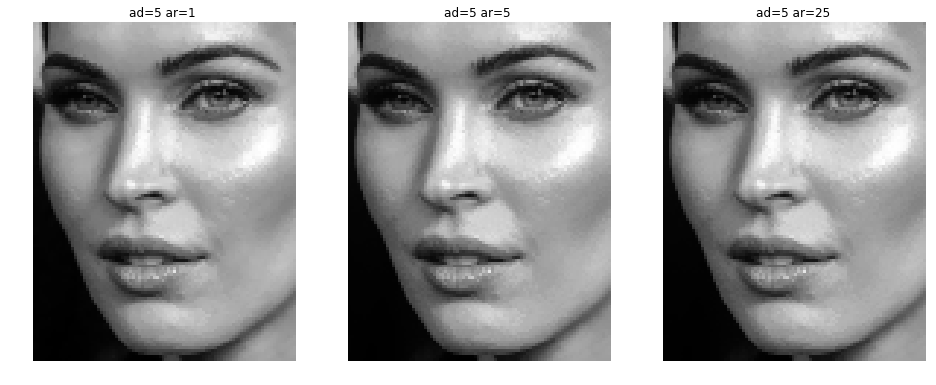

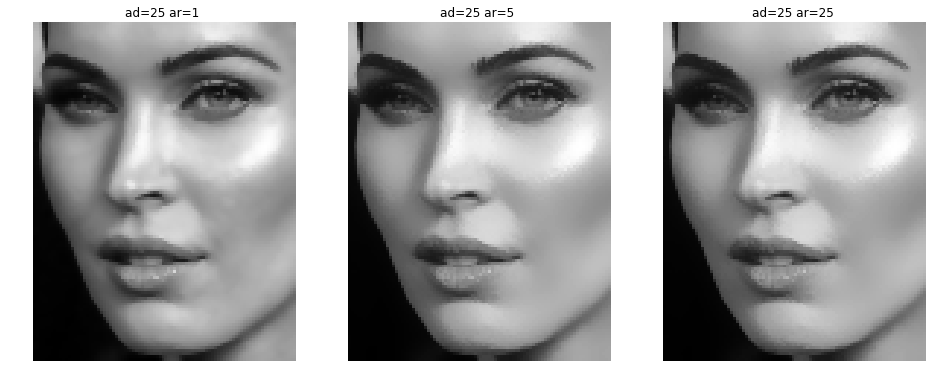

In [62]:
#img=cv2.resize(im1,(0,0),fx=0.5,fy=0.5)
cases = [1,5,25]
for i in range(3):
    fig = plt.figure(figsize=(16,8))
    for j in range(3):
        ax = fig.add_subplot(1,3,j + 1)
        filtered_im = bilateral_filter(img,cases[i],cases[j],10)       
        ax.imshow(np.array(filtered_im), cmap='gray')
        ax.axis('off')
        ax.set_title('ad={} ar={} '.format(cases[i],cases[j]))
plt.show()

 *Answer*
  - Increase in ad/ar increases the smoothing effect of domain kernel 
  - Decrease in ad/ar increases the sharpening of the image